In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os
import glob as gb
import cv2
import shutil
import pickle
from tensorflow import keras
import tensorflow as tf
from keras.applications.vgg19 import VGG19
from keras.layers import Dense, Conv2D, MaxPooling2D, AvgPool2D, Input, Dropout, Flatten, BatchNormalization
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
trainpath ='/content/drive/MyDrive/covid19/dataset-covid/train/'
testpath='/content/drive/MyDrive/covid19/dataset-covid/test/'
Valpath='/content/drive/MyDrive/covid19/dataset-covid/val/'

In [ ]:
#preprocessing data set
#convert image to RGB
#resize Image
#label image

In [4]:
#x_train,y_train
#due to session crash i will take only 500 image
new_size=224    
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( trainpath  + folder + '/*.png'))
    print( 'numbers of images in folder are : ', len(files))
    count=0
    for file in files: 
        image_class = {'covid': 0, 'Lung-Opacity': 1,'Normal':2,'viral-Pneumonia':3}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_train.append(resized_image)
        y_train.append(image_class[folder])
        count=count+1
        if(count==300):
          break

print("X_train:       ",len(X_train) ) 
print("y_train:       ",len(y_train) ) 

folder name is :  covid
numbers of images in folder are :  2531
folder name is :  Lung-Opacity
numbers of images in folder are :  4208
folder name is :  Normal
numbers of images in folder are :  1508
folder name is :  viral-Pneumonia
numbers of images in folder are :  941
X_train:        1200
y_train:        1200


In [5]:
#300
#x_test,y_test
new_size=224    
X_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( testpath  + folder + '/*.png'))
    print( 'numbers of images in folder are : ', len(files))
    count=0
    for file in files: 
        image_class = {'covid': 0, 'Lung-Opacity': 1,'Normal':2,'viral-Pneumonia':3}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_test.append(resized_image)
        y_test.append(image_class[folder])
        count=count+1
        if(count==100):
          break

print("X_test:       ",len(X_test) ) 
print("y_test:       ",len(y_test) ) 

folder name is :  covid
numbers of images in folder are :  724
folder name is :  Lung-Opacity
numbers of images in folder are :  1203
folder name is :  Normal
numbers of images in folder are :  2039
folder name is :  viral-Pneumonia
numbers of images in folder are :  270
X_test:        400
y_test:        400


In [6]:
#x_validation ,y_validation
#200
new_size=224    
X_val = []
y_val = []
for folder in  os.listdir(Valpath ) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( Valpath  + folder + '/*.png'))
    print( 'numbers of images in folder are : ', len(files))
    count=0
    for file in files: 
        image_class = {'covid': 0, 'Lung-Opacity': 1,'Normal':2,'viral-Pneumonia':3}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_val.append(list(resized_image))
        y_val.append(image_class[folder])
        count=count+1
        if(count==200):
          break
print("X_val is:       ",len(X_val) ) 
print("y_val is:       ",len(y_val))

folder name is :  covid
numbers of images in folder are :  361
folder name is :  Lung-Opacity
numbers of images in folder are :  601
folder name is :  Normal
numbers of images in folder are :  1019
folder name is :  viral-Pneumonia
numbers of images in folder are :  134
X_val is:        734
y_val is:        734


In [7]:
#convert to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [8]:
#using categorical method
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,4)
y_val = to_categorical(y_val,4)
y_test = to_categorical(y_test,4)

In [9]:
#shuffel data
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)
X_val,y_val = shuffle(X_val,y_val)
X_test,y_test = shuffle(X_test,y_test)

In [10]:
#last step using normalization
X_train=X_train/255.0
X_val=X_val/255.0
X_test=X_test/255.0

In [ ]:
#save the dataset frame 

#with open("/content/drive/MyDrive/covid19/dataset-covid/X_train.txt", "wb") as fp:   #Pickling
#  pickle.dump(X_train, fp)
#with open("/content/drive/MyDrive/covid19/dataset-covid/y_train.txt", "wb") as fp:   #Pickling
#  pickle.dump(y_train, fp)

#with open("/content/drive/MyDrive/covid19/dataset-covid/X_val.txt", "wb") as fp:   #Pickling
#  pickle.dump(X_val, fp)
#with open("/content/drive/MyDrive/covid19/dataset-covid/y_val.txt", "wb") as fp:   #Pickling
#  pickle.dump(y_val, fp)

#with open("/content/drive/MyDrive/covid19/dataset-covid/X_test.txt", "wb") as fp:   #Pickling
#  pickle.dump(X_test, fp)
#with open("/content/drive/MyDrive/covid19/dataset-covid/y_test.txt", "wb") as fp:   #Pickling
#  pickle.dump(y_test, fp)


In [3]:
#read the dataset 
with open("/content/drive/MyDrive/covid19/dataset-covid/X_train.txt", "rb") as fp:   #Pickling
  X_train = pickle.load(fp)
with open("/content/drive/MyDrive/covid19/dataset-covid/y_train.txt", "rb") as fp:   #Pickling
  y_train = pickle.load(fp)
with open("/content/drive/MyDrive/covid19/dataset-covid/X_val.txt", "rb") as fp:   #Pickling
  X_val = pickle.load(fp)
with open("/content/drive/MyDrive/covid19/dataset-covid/y_val.txt", "rb") as fp:   #unPickling
  y_val = pickle.load(fp)
with open("/content/drive/MyDrive/covid19/dataset-covid/X_test.txt", "rb") as fp:   #unPickling
  X_test = pickle.load(fp)
with open("/content/drive/MyDrive/covid19/dataset-covid/y_test.txt", "rb") as fp:   #unPickling
  y_test = pickle.load(fp)

In [ ]:
#AlexNEt model
#we implement the AlexNet CNN architecture from scratch. Through the utilization of Keras Sequential API
#The problem is i can't find imagenet weights for this model
#i will reconstruct this model

In [30]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4,activation='softmax')  
    
    
])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 54, 54, 128)       46592     
                                                                 
 batch_normalization_10 (Bat  (None, 54, 54, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 128)      0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 27, 27, 256)       819456    
                                                                 
 batch_normalization_11 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                                
                                                      

In [32]:
#train last layer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
epochs = 100
earlystop = EarlyStopping("val_accuracy", patience=30, verbose=1, restore_best_weights=True,)
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=epochs,callbacks=[earlystop])

Epoch 1/100
38/38 [==============================] - 6s 81ms/step - loss: 2.3465 - accuracy: 0.5333 - val_loss: 28.5086 - val_accuracy: 0.2725
Epoch 2/100
38/38 [==============================] - 2s 40ms/step - loss: 1.0642 - accuracy: 0.6758 - val_loss: 4.0354 - val_accuracy: 0.2779
Epoch 3/100
38/38 [==============================] - 2s 40ms/step - loss: 0.7969 - accuracy: 0.7292 - val_loss: 1.5175 - val_accuracy: 0.5218
Epoch 4/100
38/38 [==============================] - 2s 40ms/step - loss: 0.7209 - accuracy: 0.7533 - val_loss: 1.2338 - val_accuracy: 0.5817
Epoch 5/100
38/38 [==============================] - 1s 40ms/step - loss: 0.5928 - accuracy: 0.7842 - val_loss: 1.5225 - val_accuracy: 0.6294
Epoch 6/100
38/38 [==============================] - 1s 39ms/step - loss: 0.5331 - accuracy: 0.7992 - val_loss: 1.5210 - val_accuracy: 0.6458
Epoch 7/100
38/38 [==============================] - 2s 40ms/step - loss: 0.4943 - accuracy: 0.8158 - val_loss: 1.5453 - val_accuracy: 0.6608
Epoch

In [33]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 32ms/step - loss: 2.0425 - accuracy: 0.7925


[2.0425052642822266, 0.7925000190734863]

In [34]:
y_test_pred = model.predict(X_test)
y_prediction = np.argmax(y_test_pred, axis=1)
y_true=np.argmax(y_test, axis=1)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_true, y_prediction)
cm

array([[73, 15, 10,  2],
       [13, 77, 10,  0],
       [ 9,  8, 71, 12],
       [ 2,  2,  0, 96]])

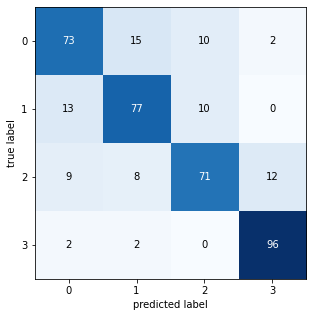

In [36]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_prediction,target_names=list((image_class))))

                 precision    recall  f1-score   support

          covid       0.75      0.73      0.74       100
   Lung-Opacity       0.75      0.77      0.76       100
         Normal       0.78      0.71      0.74       100
viral-Pneumonia       0.87      0.96      0.91       100

       accuracy                           0.79       400
      macro avg       0.79      0.79      0.79       400
   weighted avg       0.79      0.79      0.79       400



In [11]:
#using vgg model with the saved weight in this model and add dense layer with our 4 classes
#vgg19
vgg = VGG19(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False
flat_layer = Flatten()(vgg.output)
final_layer = Dense(4, activation='softmax')(flat_layer)
model = Model(inputs=vgg.input, outputs=final_layer)
model.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [12]:
#train last layer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
epochs = 100
earlystop = EarlyStopping("val_accuracy", patience=30, verbose=1, restore_best_weights=True,)
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=epochs,callbacks=[earlystop])

Epoch 1/100
38/38 [==============================] - 26s 408ms/step - loss: 1.5929 - accuracy: 0.5433 - val_loss: 1.4164 - val_accuracy: 0.5872
Epoch 2/100
38/38 [==============================] - 10s 276ms/step - loss: 0.4066 - accuracy: 0.8667 - val_loss: 0.9591 - val_accuracy: 0.7098
Epoch 3/100
38/38 [==============================] - 10s 278ms/step - loss: 0.2892 - accuracy: 0.9125 - val_loss: 0.8642 - val_accuracy: 0.7425
Epoch 4/100
38/38 [==============================] - 10s 277ms/step - loss: 0.2267 - accuracy: 0.9425 - val_loss: 1.0363 - val_accuracy: 0.7153
Epoch 5/100
38/38 [==============================] - 11s 280ms/step - loss: 0.2127 - accuracy: 0.9375 - val_loss: 1.0180 - val_accuracy: 0.7398
Epoch 6/100
38/38 [==============================] - 11s 283ms/step - loss: 0.1554 - accuracy: 0.9600 - val_loss: 1.0244 - val_accuracy: 0.7670
Epoch 7/100
38/38 [==============================] - 11s 284ms/step - loss: 0.1224 - accuracy: 0.9725 - val_loss: 1.0004 - val_accuracy:

In [13]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 2s 177ms/step - loss: 0.6912 - accuracy: 0.8425


[0.691155195236206, 0.8424999713897705]

In [14]:
y_test_pred = model.predict(X_test)
y_prediction = np.argmax(y_test_pred, axis=1)
y_true=np.argmax(y_test, axis=1)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_true, y_prediction)
cm

array([[70, 20, 10,  0],
       [ 2, 90,  8,  0],
       [ 4,  6, 78, 12],
       [ 0,  0,  1, 99]])

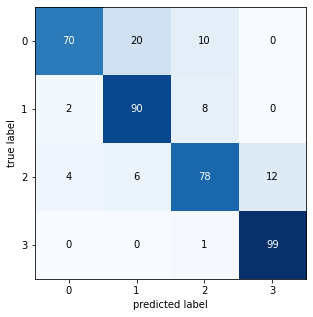

In [16]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_prediction,target_names=list((image_class))))

                 precision    recall  f1-score   support

          covid       0.92      0.70      0.80       100
   Lung-Opacity       0.78      0.90      0.83       100
         Normal       0.80      0.78      0.79       100
viral-Pneumonia       0.89      0.99      0.94       100

       accuracy                           0.84       400
      macro avg       0.85      0.84      0.84       400
   weighted avg       0.85      0.84      0.84       400



In [49]:
#inception
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
for layer in base_model.layers:
    layer.trainable = False
flat_layer = Flatten()(base_model.output)
final_layer = Dense(4, activation='softmax')(flat_layer)
model = Model(inputs=base_model.input, outputs=final_layer)
model.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_15 (Conv2D)             (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_15 (BatchN  (None, 111, 111, 32  96         ['conv2d_15[0][0]']              
 ormalization)             

In [50]:
#train last layer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
epochs = 100
earlystop = EarlyStopping("val_accuracy", patience=30, verbose=1, restore_best_weights=True,)
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=epochs,callbacks=[earlystop])

Epoch 1/100
38/38 [==============================] - 14s 238ms/step - loss: 5.1578 - accuracy: 0.6100 - val_loss: 5.6042 - val_accuracy: 0.6417
Epoch 2/100
38/38 [==============================] - 4s 119ms/step - loss: 1.3717 - accuracy: 0.8000 - val_loss: 5.0759 - val_accuracy: 0.7057
Epoch 3/100
38/38 [==============================] - 5s 133ms/step - loss: 0.8608 - accuracy: 0.8683 - val_loss: 3.9971 - val_accuracy: 0.7289
Epoch 4/100
38/38 [==============================] - 5s 124ms/step - loss: 0.2247 - accuracy: 0.9400 - val_loss: 4.8271 - val_accuracy: 0.7166
Epoch 5/100
38/38 [==============================] - 4s 119ms/step - loss: 0.0485 - accuracy: 0.9867 - val_loss: 4.9698 - val_accuracy: 0.6907
Epoch 6/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0234 - accuracy: 0.9908 - val_loss: 3.8327 - val_accuracy: 0.7330
Epoch 7/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 4.3810 - val_accuracy: 0.724

In [51]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 1s 73ms/step - loss: 2.8395 - accuracy: 0.7750


[2.8395044803619385, 0.7749999761581421]

In [52]:
y_test_pred = model.predict(X_test)
y_prediction = np.argmax(y_test_pred, axis=1)
y_true=np.argmax(y_test, axis=1)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_true, y_prediction)
cm

array([[55, 21, 18,  6],
       [ 7, 84,  7,  2],
       [ 6,  9, 72, 13],
       [ 0,  1,  0, 99]])

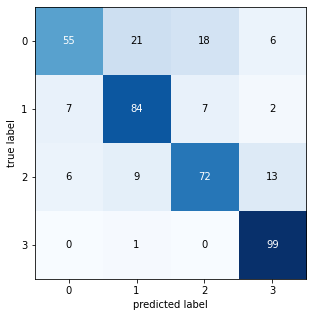

In [54]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_prediction,target_names=list((image_class))))

                 precision    recall  f1-score   support

          covid       0.81      0.55      0.65       100
   Lung-Opacity       0.73      0.84      0.78       100
         Normal       0.74      0.72      0.73       100
viral-Pneumonia       0.82      0.99      0.90       100

       accuracy                           0.78       400
      macro avg       0.78      0.78      0.77       400
   weighted avg       0.78      0.78      0.77       400



In [56]:
#ResNet152V2
base_model =tf.keras.applications.ResNet152V2(include_top=False,weights='imagenet',input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
flat_layer = Flatten()(base_model.output)
final_layer = Dense(4, activation='softmax')(flat_layer)
model = Model(inputs=base_model.input, outputs=final_layer)
model.summary()

234561536/234545216 [==============================] - 2s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                         

In [57]:
#train last layer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
epochs = 100
earlystop = EarlyStopping("val_accuracy", patience=30, verbose=1, restore_best_weights=True,)
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=epochs,callbacks=[earlystop])

Epoch 1/100
38/38 [==============================] - 28s 489ms/step - loss: 4.1836 - accuracy: 0.7158 - val_loss: 5.4174 - val_accuracy: 0.7466
Epoch 2/100
38/38 [==============================] - 14s 373ms/step - loss: 0.3825 - accuracy: 0.9450 - val_loss: 6.2700 - val_accuracy: 0.7248
Epoch 3/100
38/38 [==============================] - 14s 378ms/step - loss: 0.0943 - accuracy: 0.9792 - val_loss: 5.8856 - val_accuracy: 0.7507
Epoch 4/100
38/38 [==============================] - 14s 359ms/step - loss: 0.0468 - accuracy: 0.9925 - val_loss: 5.3599 - val_accuracy: 0.7439
Epoch 5/100
38/38 [==============================] - 14s 366ms/step - loss: 0.0187 - accuracy: 0.9925 - val_loss: 5.5747 - val_accuracy: 0.7589
Epoch 6/100
38/38 [==============================] - 14s 366ms/step - loss: 0.0078 - accuracy: 0.9983 - val_loss: 6.1168 - val_accuracy: 0.7602
Epoch 7/100
38/38 [==============================] - 14s 368ms/step - loss: 0.0141 - accuracy: 0.9942 - val_loss: 5.9930 - val_accuracy:

In [58]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 3s 216ms/step - loss: 3.7953 - accuracy: 0.8300


[3.7953379154205322, 0.8299999833106995]

In [59]:
y_test_pred = model.predict(X_test)
y_prediction = np.argmax(y_test_pred, axis=1)
y_true=np.argmax(y_test, axis=1)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_true, y_prediction)
cm

array([[ 70,  20,   8,   2],
       [  6,  91,   3,   0],
       [  4,  13,  71,  12],
       [  0,   0,   0, 100]])

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_prediction,target_names=list((image_class))))

                 precision    recall  f1-score   support

          covid       0.88      0.70      0.78       100
   Lung-Opacity       0.73      0.91      0.81       100
         Normal       0.87      0.71      0.78       100
viral-Pneumonia       0.88      1.00      0.93       100

       accuracy                           0.83       400
      macro avg       0.84      0.83      0.83       400
   weighted avg       0.84      0.83      0.83       400



In [42]:
#DenseNet121
base_model =tf.keras.applications.DenseNet121(include_top=False,weights='imagenet',input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
flat_layer = Flatten()(base_model.output)
final_layer = Dense(4, activation='softmax')(flat_layer)
model = Model(inputs=base_model.input, outputs=final_layer)
model.summary()

29097984/29084464 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                           

In [43]:
#train last layer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
epochs = 100
earlystop = EarlyStopping("val_accuracy", patience=30, verbose=1, restore_best_weights=True,)
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=epochs,callbacks=[earlystop])

Epoch 1/100
38/38 [==============================] - 17s 278ms/step - loss: 3.1092 - accuracy: 0.6758 - val_loss: 3.3893 - val_accuracy: 0.7439
Epoch 2/100
38/38 [==============================] - 6s 163ms/step - loss: 0.4780 - accuracy: 0.8750 - val_loss: 4.3630 - val_accuracy: 0.7684
Epoch 3/100
38/38 [==============================] - 6s 148ms/step - loss: 0.1457 - accuracy: 0.9492 - val_loss: 3.9065 - val_accuracy: 0.7779
Epoch 4/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0552 - accuracy: 0.9817 - val_loss: 4.0650 - val_accuracy: 0.7861
Epoch 5/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0348 - accuracy: 0.9883 - val_loss: 4.0821 - val_accuracy: 0.7875
Epoch 6/100
38/38 [==============================] - 5s 145ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 4.0898 - val_accuracy: 0.7847
Epoch 7/100
38/38 [==============================] - 6s 147ms/step - loss: 8.3495e-04 - accuracy: 1.0000 - val_loss: 4.0908 - val_accuracy: 0

In [44]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 1s 92ms/step - loss: 2.7046 - accuracy: 0.8325


[2.7046267986297607, 0.8324999809265137]

In [45]:
y_test_pred = model.predict(X_test)
y_prediction = np.argmax(y_test_pred, axis=1)
y_true=np.argmax(y_test, axis=1)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_true, y_prediction)
cm

array([[ 64,  25,   7,   4],
       [  3,  92,   4,   1],
       [  3,   8,  77,  12],
       [  0,   0,   0, 100]])

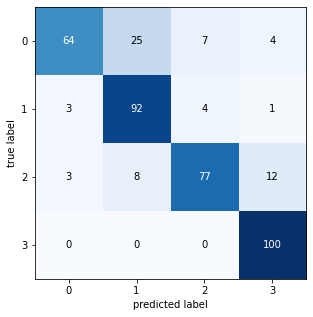

In [47]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_prediction,target_names=list((image_class))))

                 precision    recall  f1-score   support

          covid       0.91      0.64      0.75       100
   Lung-Opacity       0.74      0.92      0.82       100
         Normal       0.88      0.77      0.82       100
viral-Pneumonia       0.85      1.00      0.92       100

       accuracy                           0.83       400
      macro avg       0.84      0.83      0.83       400
   weighted avg       0.84      0.83      0.83       400

